In [1]:
from ultralytics import YOLO
import cv2
from PIL import Image
from IPython.display import display
import numpy as np
import torch

In [2]:
# Chose Apple Metal Performance Shaders (MPS) if available, otherwise use CPU
# device = 'mps' if torch.backends.mps.is_available() else 'cpu'

# Use temporary CPU for now. There is some issue with MPS
device = 'cpu'

## Load pretrained YOLOv8 model

In [3]:
model = YOLO('./runs/detect/yolov8m_climbing_crux_model6/weights/best.pt')

In [4]:
img = cv2.imread('./../datasets/images/test/23.jpeg')

In [5]:
results = model(
    img, 
    device=device, 
    conf=0.9,
    imgsz=800
)

0: 800x608 48 holds, 844.8ms
Speed: 6.1ms preprocess, 844.8ms inference, 13.5ms postprocess per image at shape (1, 3, 800, 608)


## Get first result

In [6]:
result = results[0]

In [7]:
print(result.names)

{0: 'hold', 1: 'volume'}


In [8]:
bboxes = np.array(result.boxes.xyxy.cpu(), dtype=int)
classes = np.array(result.boxes.cls.cpu(), dtype=int)

In [9]:
centers = (bboxes[:, :2] + bboxes[:, 2:]) / 2

In [10]:
# 20% of bottom boxes from image
bottom_boxes = bboxes[bboxes[:, 3] > 0.8 * img.shape[0]]

# Draw bounding boxes

In [11]:
box_color = (0, 255, 0)
center_color = (0, 0, 255)
thickness = 2

for cls, bbox, center in zip(classes, bboxes, centers):
    x1, y1, x2, y2 = bbox
    
    cv2.rectangle(img, (x1, y1), (x2, y2), box_color, thickness)
    cv2.circle(img, (int(center[0]), int(center[1])), 5, center_color, -1)
    
    result_name = result.names[cls]
    cv2.putText(img, result_name, (x1, y1 - 5), cv2.FONT_HERSHEY_PLAIN, 1, box_color, thickness)

## Draw the preview

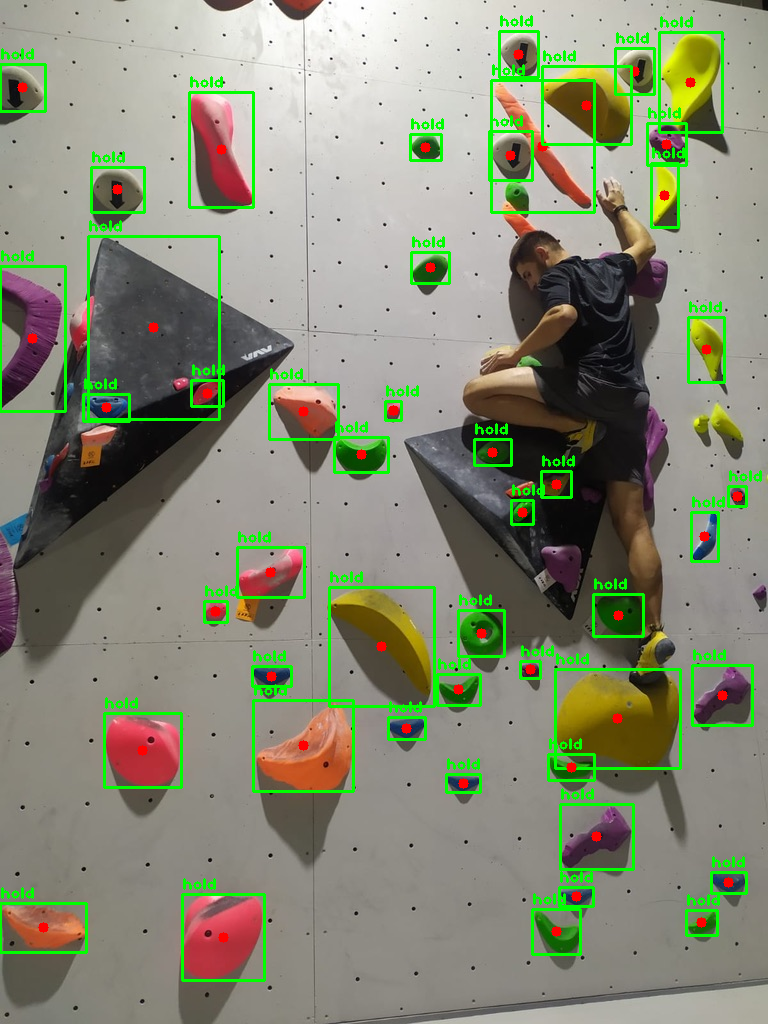

In [12]:
preview = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(preview))